# Programming Assignment

## Saving and loading models, with application to the EuroSat dataset

### Instructions

In this notebook, you will create a neural network that classifies land uses and land covers from satellite imagery. You will save your model using Tensorflow's callbacks and reload it later. You will also load in a pre-trained neural network classifier and compare performance with it.

Some code cells are provided for you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line:

`#### GRADED CELL ####`

Don't move or edit this first line - this is what the automatic grader looks for to recognise graded cells. These cells require you to write your own code to complete them, and are automatically graded when you submit the notebook. Don't edit the function name or signature provided in these cells, otherwise the automatic grader might not function properly. Inside these graded cells, you can use any functions or classes that are imported below, but make sure you don't use any variables that are outside the scope of the function.

### How to submit

Complete all the tasks you are asked for in the worksheet. When you have finished and are happy with your code, press the **Submit Assignment** button at the top of this notebook.

### Let's get started!

We'll start running some imports, and loading the dataset. Do not edit the existing imports in the following cell. If you would like to make further Tensorflow imports, you should add them here.

# Import the data

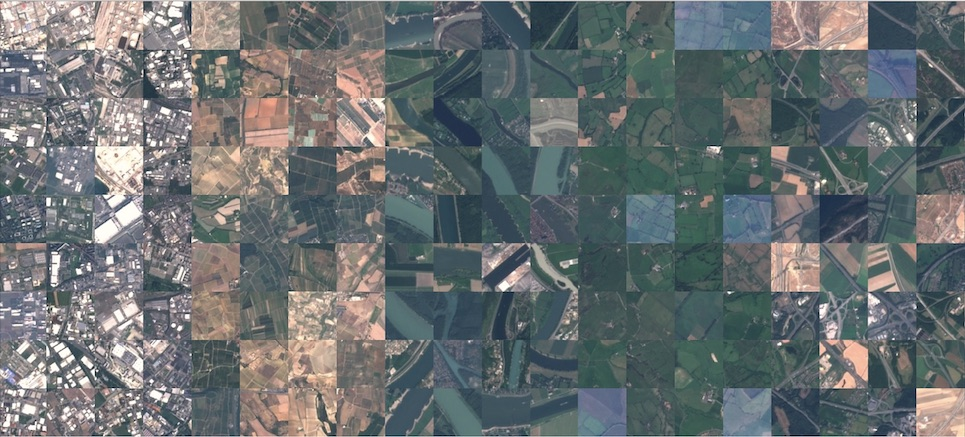

#### The EuroSAT dataset

In this assignment, you will use the [EuroSAT dataset](https://github.com/phelber/EuroSAT). It consists of 27000 labelled Sentinel-2 satellite images of different land uses: residential, industrial, highway, river, forest, pasture, herbaceous vegetation, annual crop, permanent crop and sea/lake. For a reference, see the following papers:
- Eurosat: A novel dataset and deep learning benchmark for land use and land cover classification. Patrick Helber, Benjamin Bischke, Andreas Dengel, Damian Borth. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2019.
- Introducing EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification. Patrick Helber, Benjamin Bischke, Andreas Dengel. 2018 IEEE International Geoscience and Remote Sensing Symposium, 2018.

Your goal is to construct a neural network that classifies a satellite image into one of these 10 classes, as well as applying some of the saving and loading techniques you have learned in the previous sessions.

#### Import the data

The dataset you will train your model on is a subset of the total data, with 4000 training images and 1000 testing images, with roughly equal numbers of each class.
The train and test datasets required for this project can be downloaded from the following links:

`x_train`: https://drive.google.com/open?id=1cUaIEd9-MLJHFGjLz5QziNvfBtYygplX

`y_train`: https://drive.google.com/open?id=1hv24Ufiio9rBeSqgnNoM3dr5sVGwOmBy

`x_test`: https://drive.google.com/open?id=1AH9lKHT5P2oQLz8SGMRPWs_M9wIM2ZRH

`y_test`: https://drive.google.com/open?id=1i4_azocSDuU3TcDf3OSHO1vF0D5-xMU6

You should store these files in Drive for use in this Colab notebook.

In [2]:
# create the new folder weekly_data and download the data from the link provided in the instructions
!mkdir -p weekly_data
!wget -P weekly_data/ https://zenodo.org/api/records/7711810/files-archive

--2025-11-27 08:44:12--  https://zenodo.org/api/records/7711810/files-archive
Resolving zenodo.org (zenodo.org)... 188.185.48.75, 137.138.52.235, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘weekly_data/files-archive’

files-archive           [  <=>               ]   2.01G  1.56MB/s    in 35m 42s 

2025-11-27 09:19:59 (985 KB/s) - ‘weekly_data/files-archive’ saved [2160061446]



In [6]:
!mv weekly_data/files-archive weekly_data/files-archive.zip

In [7]:
zip_path = "weekly_data/files-archive.zip"

In [3]:
# add the folder to gitignore
!echo "weekly_data/" >> .gitignore

In [ ]:
!unzip -l weekly_data/files-archive.zip | head -40

/bin/bash: line 1: unzip: command not found


In [10]:
import zipfile

zip_path = "weekly_data/files-archive.zip"  # or "weekly_data/files-archive.zip"

with zipfile.ZipFile(zip_path, "r") as zf:
    files = zf.namelist()
    print("Number of entries:", len(files))
    for name in files[:40]:
        print(name)

Number of entries: 2
EuroSAT_MS.zip
EuroSAT_RGB.zip


In [11]:
import zipfile
from pathlib import Path

outer_zip = Path("weekly_data/files-archive.zip")  # or .zip if you renamed it
output_dir = Path("weekly_data")
output_dir.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(outer_zip, "r") as zf:
    # Extract only the RGB version
    zf.extract("EuroSAT_RGB.zip", path=output_dir)
    # If you also want MS:
    # zf.extract("EuroSAT_MS.zip", path=output_dir)

print((output_dir / "EuroSAT_RGB.zip").exists())  # should be True


True


In [16]:
inner_zip = output_dir / "EuroSAT_RGB.zip"
rgb_dir = output_dir / "EuroSAT_RGB"
rgb_dir.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(inner_zip, "r") as zf:
    zf.extractall(rgb_dir)

print("Extracted to:", rgb_dir)

Extracted to: weekly_data/EuroSAT_RGB


In [19]:
# view all the new files in the folder
!ls -lR weekly_data /EuroSAT_RGB | head -40

ls: cannot access '/EuroSAT_RGB': No such file or directory
weekly_data:
total 2201888
drwxr-xr-x 3 nvidia nvidia       4096 Nov 27 09:43 EuroSAT_RGB
-rw-r--r-- 1 nvidia nvidia   94658721 Nov 27 09:43 EuroSAT_RGB.zip
-rw-r--r-- 1 nvidia nvidia 2160061446 Nov 27 09:19 files-archive.zip

weekly_data/EuroSAT_RGB:
total 4
drwxr-xr-x 12 nvidia nvidia 4096 Nov 27 09:43 EuroSAT_RGB

weekly_data/EuroSAT_RGB/EuroSAT_RGB:
total 1168
drwxr-xr-x 2 nvidia nvidia 126976 Nov 27 09:43 AnnualCrop
drwxr-xr-x 2 nvidia nvidia 118784 Nov 27 09:43 Forest
drwxr-xr-x 2 nvidia nvidia 176128 Nov 27 09:43 HerbaceousVegetation
drwxr-xr-x 2 nvidia nvidia  94208 Nov 27 09:43 Highway
drwxr-xr-x 2 nvidia nvidia 110592 Nov 27 09:43 Industrial
drwxr-xr-x 2 nvidia nvidia  69632 Nov 27 09:43 Pasture
drwxr-xr-x 2 nvidia nvidia 131072 Nov 27 09:43 PermanentCrop
drwxr-xr-x 2 nvidia nvidia 135168 Nov 27 09:43 Residential
drwxr-xr-x 2 nvidia nvidia  81920 Nov 27 09:43 River
drwxr-xr-x 2 nvidia nvidia 118784 Nov 27 09:43 SeaLa